Nama: Gaitsa Nazwa Kansa

NPM: 24083010014

Tugas 1 Matematika Diskrit A

In [97]:
# Import library
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm

In [83]:
# Ganti dengan nama file hasil upload
df = pd.read_csv("data_mahasiswa.csv")

# Hapus semua kolom yang namanya mengandung 'Unnamed'
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Cek hasil setelah dibersihkan
df.head()

,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
0,24083010001,MADINA HEDY ALIFANTI,0.5,0.7,0.7,1.0
1,24083010003,MARIA DWI KURNIASIH,0.6,0.2,0.8,0.9
2,24083010005,ADINDA PUTRI RACHMAWATI,0.9,0.8,0.7,0.6
3,24083010006,AQUINA SYABITA,0.8,0.5,0.7,0.5
4,24083010007,VARID PUTRA PRATAMA,0.5,0.0,0.2,0.0


In [84]:
# Pilih kolom numerik (C)
C = df[["ADIL DAN AMANAH", "SUKA MEMBANTU", "NYAMBUNG KALAU NGOROL", "ASYIK DAN MENARIK"]].values

# Tentukan bobot prioritas P
# contoh: lebih penting adil dan amanah, lalu suka membantu, lalu ngobrol, terakhir asyik
P = np.array([0.4, 0.3, 0.2, 0.1])   # jumlah harus = 1

# Hitung skor total (C * P)
scores = C @ P

# Masukkan skor ke dataframe
df["Skor"] = scores

# Urutkan dan pilih 4 tertinggi
top4 = df.sort_values("Skor", ascending=False).head(4)

print(top4[["NAMA", "Skor"]])

                        NAMA  Skor
23       CARISSA NAURA RAJWA  0.87
22  AULIYA KHOTIMATUZ ZAHROH  0.83
2    ADINDA PUTRI RACHMAWATI  0.80
34     SELVY DWI YULITA SARI  0.75


# **Matriks Kovarian**

In [85]:
# Hitung matriks kovarian
cov_matrix = df[["ADIL DAN AMANAH","SUKA MEMBANTU","NYAMBUNG KALAU NGOROL","ASYIK DAN MENARIK"]].cov()

# Tampilkan hasil dalam bentuk tabel
cov_matrix

,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
ADIL DAN AMANAH,0.060410,-0.003744,-0.024154,-0.005077
SUKA MEMBANTU,-0.003744,0.078231,0.029603,-0.007744
NYAMBUNG KALAU NGOROL,-0.024154,0.029603,0.083532,0.032718
ASYIK DAN MENARIK,-0.005077,-0.007744,0.032718,0.095487




Variansi tertinggi: Asyik & Menarik (0.095) -> aspek ini paling bervariasi antar mahasiswa.

Variansi terendah: Adil & Amanah (0.060)-> penilaian cenderung homogen.

Kovarian antar variabel relatif kecil (dekat 0) -> artinya tiap kriteria relatif berdiri sendiri, tidak banyak tumpang tindih.

--------------------------------------------------------------------------------

# **Matriks Korelasi**

In [86]:
# Hitung matriks korelasi
corr_matrix = df[["ADIL DAN AMANAH","SUKA MEMBANTU","NYAMBUNG KALAU NGOROL","ASYIK DAN MENARIK"]].corr()

corr_matrix

,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOROL,ASYIK DAN MENARIK
ADIL DAN AMANAH,1.000000,-0.054456,-0.340020,-0.066846
SUKA MEMBANTU,-0.054456,1.000000,0.366196,-0.089594
NYAMBUNG KALAU NGOROL,-0.340020,0.366196,1.000000,0.366342
ASYIK DAN MENARIK,-0.066846,-0.089594,0.366342,1.000000


Suka Membantu dengan Nyambung Ngobrol (0.37) -> hubungan positif, makin suka membantu biasanya makin nyambung diajak ngobrol.

Nyambung Ngobrol dengan Asyik & Menarik (0.37) -> cukup berkorelasi, mahasiswa yang asyik cenderung gampang nyambung.

Adil & Amanah dengan Nyambung Ngobrol (-0.34) -> agak berlawanan, mahasiswa yang sangat "adil & amanah" justru kadang dinilai kurang nyambung saat ngobrol.

--------------------------------------------------------------------------------

# **Cosine Similarity**

In [87]:
# Cosine Similarity Antar Mahasiswa
X_matrix = df[["ADIL DAN AMANAH", "SUKA MEMBANTU",
               "NYAMBUNG KALAU NGOROL", "ASYIK DAN MENARIK"]].fillna(0).values

# Ambil daftar mahasiswa dari kolom NPM
students = df["NPM"]

# Hitung norm tiap mahasiswa
norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)

# Hitung cosine similarity
cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)

# Buat DataFrame hasil
cosine_df = pd.DataFrame(cosine_sim, index=students, columns=students)

# Tampilkan hasil
cosine_df.head()

NPM,24083010001,24083010003,24083010005,24083010006,24083010007,24083010014,24083010017,24083010019,24083010028,24083010029,...,24083010081,24083010084,24083010089,24083010090,24083010095,24083010099,24083010105,24083010106,24083010110,24083010115
NPM,,,,,,,,,,,,,,,,,,,,,
24083010001,1.000000,0.935439,0.927263,0.912647,0.484968,0.766641,0.972152,0.976541,0.930102,0.614715,...,0.770578,0.974774,0.733806,0.912754,0.992157,0.708932,0.788558,0.877177,0.930102,0.614715
24083010003,0.935439,1.000000,0.872615,0.915625,0.628019,0.734919,0.952978,0.977978,0.835501,0.644569,...,0.629443,0.945043,0.819424,0.831826,0.911365,0.561761,0.765869,0.978228,0.835501,0.644569
24083010005,0.927263,0.872615,1.000000,0.986451,0.722419,0.946423,0.957244,0.877104,0.979884,0.782114,...,0.831602,0.892470,0.747255,0.840015,0.934128,0.892303,0.955650,0.754910,0.979884,0.782114
24083010006,0.912647,0.915625,0.986451,1.000000,0.785418,0.943550,0.966522,0.895253,0.943355,0.783635,...,0.793155,0.886785,0.777606,0.830363,0.915441,0.829207,0.948949,0.815950,0.943355,0.783635
24083010007,0.484968,0.628019,0.722419,0.785418,1.000000,0.824981,0.616183,0.494022,0.649308,0.861886,...,0.410271,0.521645,0.730462,0.347404,0.471334,0.666691,0.862060,0.517131,0.649308,0.861886


## **Visualisasi PCA**

Explained variance ratio: [0.42053852 0.29530323]
Total variance explained (2 PC): 0.7158417555799063


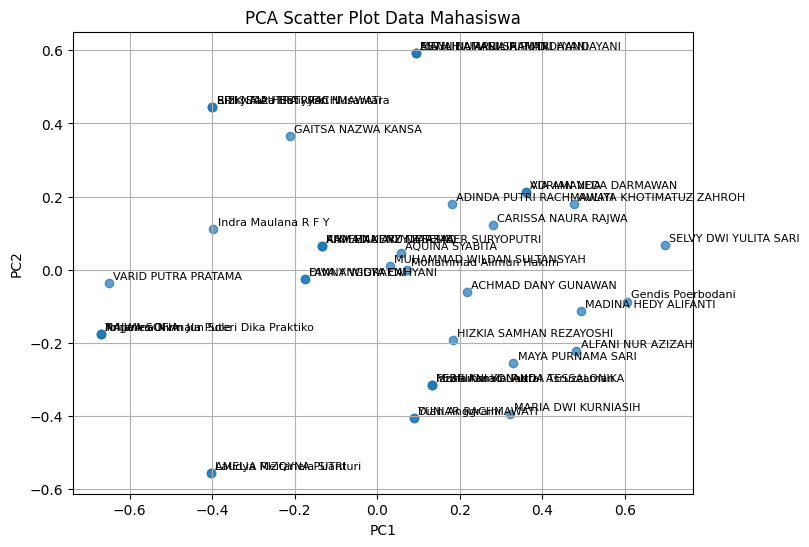

In [93]:
# Ambil data numerik
X = df[["ADIL DAN AMANAH",
        "SUKA MEMBANTU",
        "NYAMBUNG KALAU NGOROL",
        "ASYIK DAN MENARIK"]]

# Lakukan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Tambahkan hasil PCA ke dataframe
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained (2 PC):", pca.explained_variance_ratio_.sum())

# Visualisasi PDA Scatter
plt.figure(figsize=(8,6))
plt.scatter(df["PC1"], df["PC2"], alpha=0.7)

# Tambahkan nama mahasiswa
for i, nama in enumerate(df["NAMA"]):
    plt.text(df["PC1"][i]+0.01, df["PC2"][i]+0.01, nama, fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot Data Mahasiswa")
plt.grid(True)
plt.show()

Dari visualisasi PCA tersebut, dua komponen utama sudah mampu merangkum lebih dari 70% informasi. PC1 banyak dipengaruhi aspek kepribadian (Asyik & Menarik, Ngobrol), sementara PC2 lebih menekankan moral (Adil & Amanah, Membantu). Artinya, data mahasiswa dapat dipetakan ke dua dimensi besar: kepribadian dan moral.

# **Clustering (K-Means)**

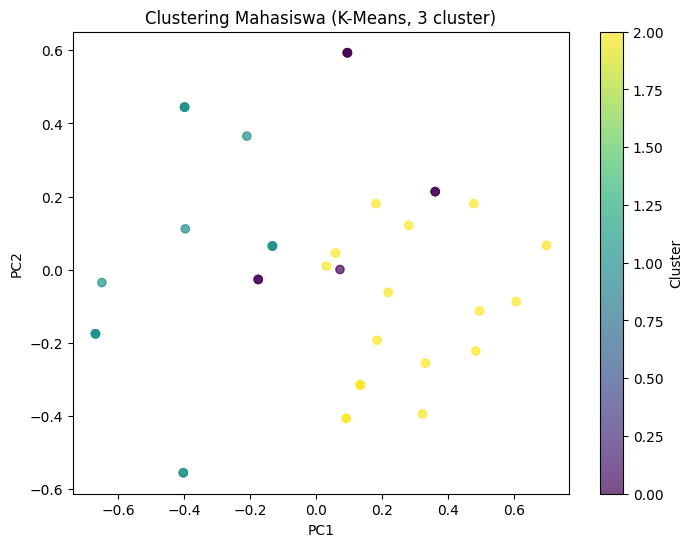

In [95]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(df["PC1"], df["PC2"], c=df["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering Mahasiswa (K-Means, 3 cluster)")
plt.colorbar(label="Cluster")
plt.show()

Clustering menghasilkan tiga kelompok mahasiswa dengan ciri berbeda. Kelompok pertama menonjol pada nilai moral, kelompok kedua lebih kuat di aspek sosial seperti membantu dan komunikasi, sementara kelompok ketiga dominan pada sisi kepribadian yang menyenangkan. Pembagian ini menegaskan bahwa tiap mahasiswa memiliki kecenderungan unik yang dapat dimanfaatkan, misalnya untuk penyusunan tim yang seimbang.

# **Heatmap Korelasi**

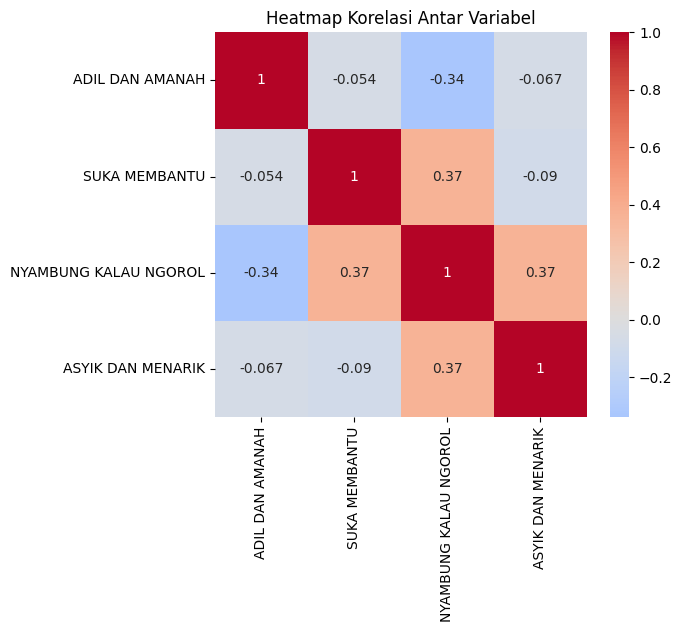

In [90]:
# Ambil data numerik
X = df[["ADIL DAN AMANAH",
        "SUKA MEMBANTU",
        "NYAMBUNG KALAU NGOROL",
        "ASYIK DAN MENARIK"]]

# Hitung korelasi
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

Hasil heatmap korelasi memperlihatkan bahwa sebagian besar variabel tidak saling berkorelasi kuat. Meski demikian, ada kecenderungan positif antara Suka Membantu dan Nyambung Ngobrol, juga antara Ngobrol dan Asyik & Menarik. Sebaliknya, Adil & Amanah tampak sedikit berlawanan dengan Ngobrol. Hubungan ini menunjukkan bahwa setiap kriteria memberi informasi yang berbeda meskipun ada irisan kecil antar aspek.

# **Boxplot**

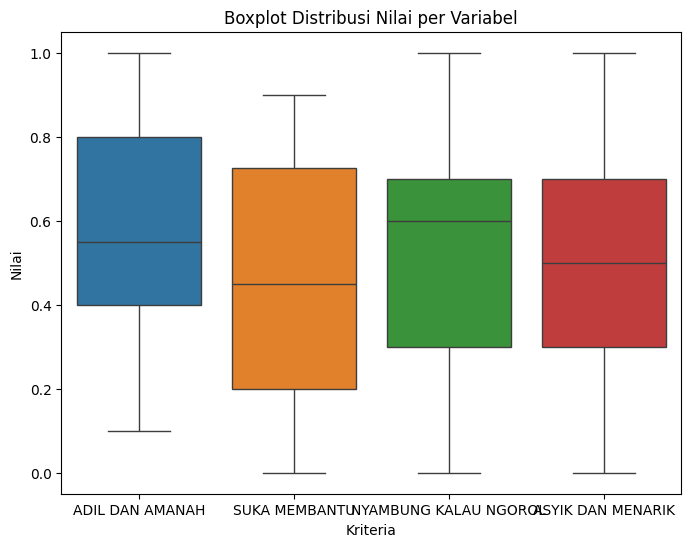

In [91]:
# Ambil data numerik
X = df[["ADIL DAN AMANAH",
        "SUKA MEMBANTU",
        "NYAMBUNG KALAU NGOROL",
        "ASYIK DAN MENARIK"]]

# Plot boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=X)
plt.title("Boxplot Distribusi Nilai per Variabel")
plt.ylabel("Nilai")
plt.xlabel("Kriteria")
plt.show()

Boxplot menggambarkan distribusi nilai setiap variabel. Aspek Adil & Amanah terlihat cukup stabil dengan sebaran yang sempit, menunjukkan penilaian mahasiswa pada kriteria ini relatif merata. Sebaliknya, Asyik & Menarik menunjukkan variasi yang lebih besar, bahkan terdapat beberapa outlier, yang artinya ada mahasiswa dengan karakteristik jauh lebih menonjol dibanding lainnya. Dua variabel lain juga memperlihatkan keragaman nilai yang cukup jelas.

# **Visualisasi Cosine Similarity**

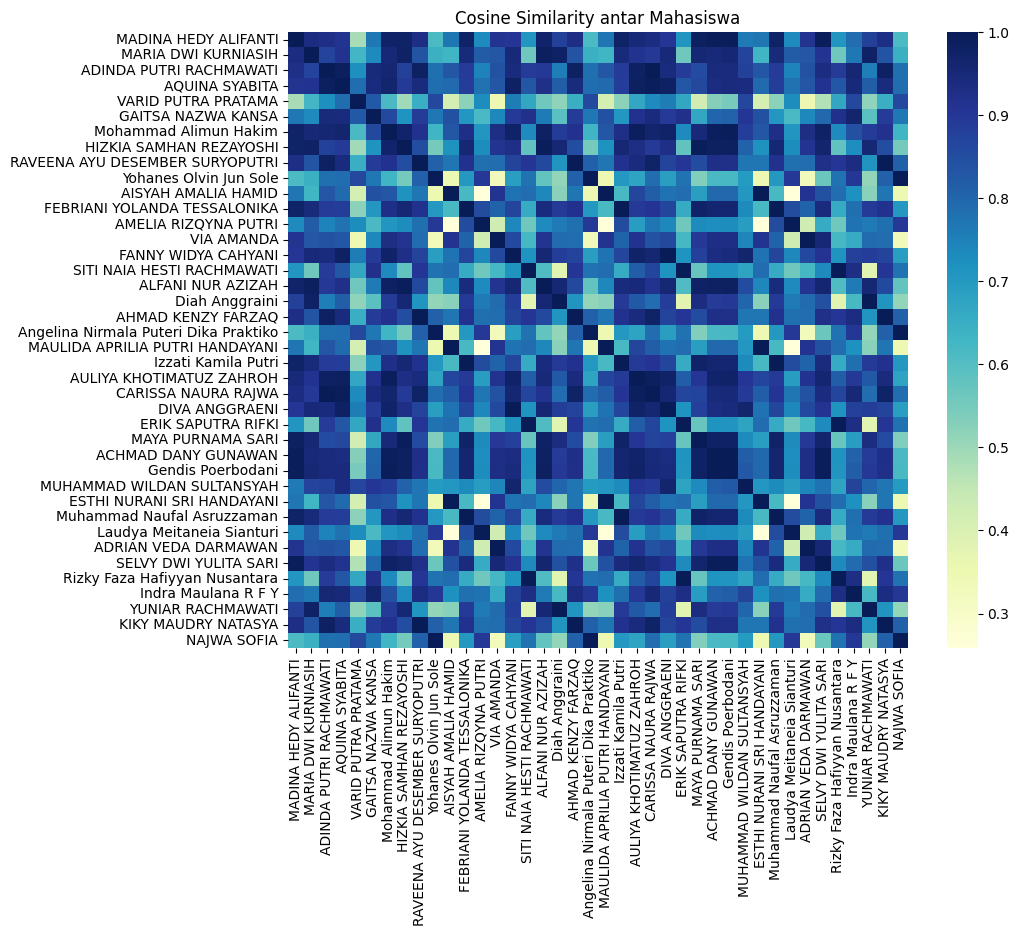

In [98]:
X = df[["ADIL DAN AMANAH","SUKA MEMBANTU","NYAMBUNG KALAU NGOROL","ASYIK DAN MENARIK"]].values
cosine_sim = (X @ X.T) / (norm(X, axis=1)[:, None] * norm(X, axis=1)[None, :])

plt.figure(figsize=(10,8))
sns.heatmap(cosine_sim, xticklabels=df["NAMA"], yticklabels=df["NAMA"], cmap="YlGnBu")
plt.title("Cosine Similarity antar Mahasiswa")
plt.show()

Visualisasi Cosine similarity menegaskan adanya mahasiswa yang mirip profilnya dan ada juga yang berbeda jauh. Visualisasinya membentuk kelompok kecil yang serupa, sehingga bermanfaat untuk melihat kecocokan dalam pembentukan tim atau kerja kelompok.

## **KESIMPULAN**

Dari semua analisis, terlihat jelas bahwa tiap mahasiswa punya keunikan masing-masing. Ada yang lebih stabil di sisi moral seperti Adil & Amanah, ada juga yang lebih menonjol di kepribadian seperti Asyik & Menarik. Beberapa aspek saling berkaitan, misalnya yang suka membantu biasanya juga gampang nyambung diajak ngobrol, tapi ada juga aspek yang justru jalan sendiri. Dengan PCA dan clustering, pola ini makin terlihat yaitu mahasiswa bisa dikelompokkan ke dalam dimensi moral dan dimensi kepribadian-sosial, lalu terbagi lagi ke tiga tipe utama sesuai kecenderungannya. Visualisasi seperti heatmap, boxplot, dan cosine similarity membantu memperjelas perbedaan maupun kemiripan antar individu. Intinya, setiap mahasiswa punya warna yang berbeda, dan keragaman inilah yang bisa jadi kekuatan kalau dipadukan dalam kerja sama atau kegiatan bersama.